# Data importing and preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('D:/Python/Python Program/HousePrice_Prediction/House_Price.csv', header = 0)

In [3]:
df.sample(5)

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
25,13.9,0.84054,38.14,0.5380,5.599,85.7,4.69,4.33,4.72,4.08,19.0,16.51,YES,9.378,13.1112,River,35,YES,0.051585
358,22.7,5.20177,48.10,0.7700,6.127,83.4,2.96,2.40,2.90,2.63,19.8,11.48,NO,6.354,15.1816,Lake and River,42,YES,0.076655
282,46.0,0.06129,33.33,0.4429,7.645,49.7,5.46,4.94,5.43,5.01,25.1,3.01,YES,8.720,12.3680,Lake,25,YES,0.051141
312,19.4,0.26169,39.90,0.5440,6.023,90.4,3.00,2.67,3.15,2.51,21.6,11.72,YES,6.288,13.1552,None,26,YES,0.053473
192,36.4,0.08664,33.44,0.4370,7.178,26.3,6.76,6.34,6.60,6.21,24.8,2.87,YES,10.528,11.2912,Lake,40,YES,0.044716


In [4]:
df.shape

(506, 19)

In [5]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


## Outlier Detection

<AxesSubplot:xlabel='crime_rate'>

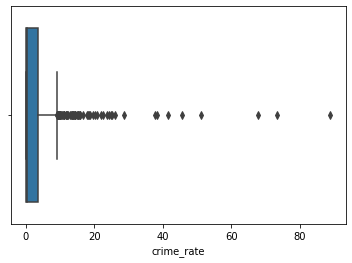

In [6]:
sns.boxplot(x = df['crime_rate'])

<function matplotlib.pyplot.show(close=None, block=None)>

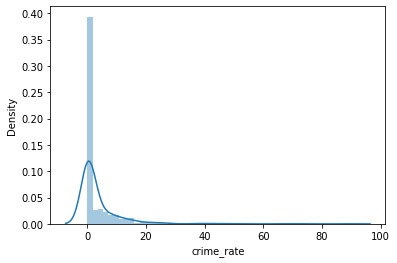

In [7]:
sns.distplot(df['crime_rate'])
plt.show

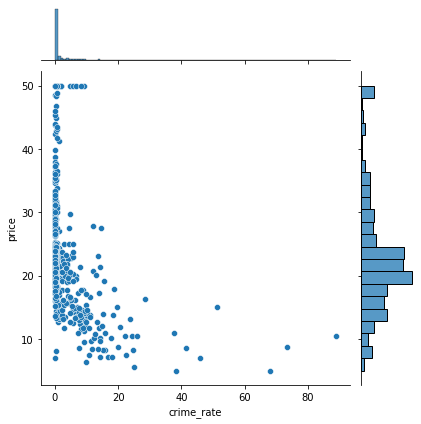

In [8]:
sns.jointplot(x = 'crime_rate', y = 'price', data = df)

<AxesSubplot:xlabel='age'>

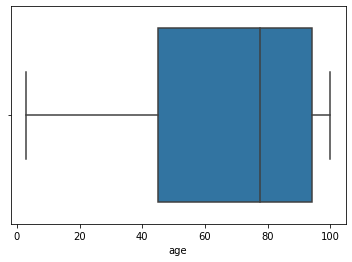

In [9]:
sns.boxplot(x = df['age'])

<function matplotlib.pyplot.show(close=None, block=None)>

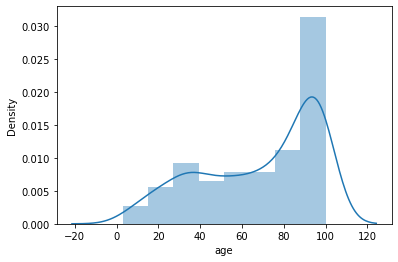

In [10]:
sns.distplot(df['age'])
plt.show

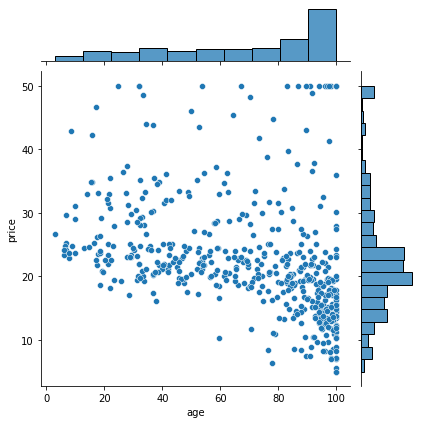

In [11]:
sns.jointplot(x = 'age', y = 'price', data = df)

<AxesSubplot:xlabel='n_hot_rooms'>

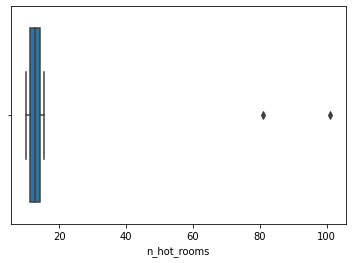

In [12]:
sns.boxplot(x = df['n_hot_rooms'])

<function matplotlib.pyplot.show(close=None, block=None)>

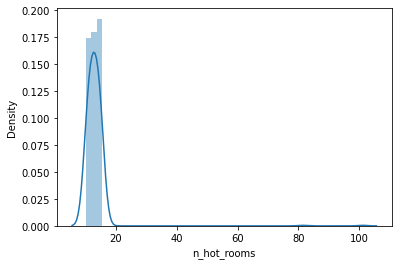

In [13]:
sns.distplot(df['n_hot_rooms'])
plt.show

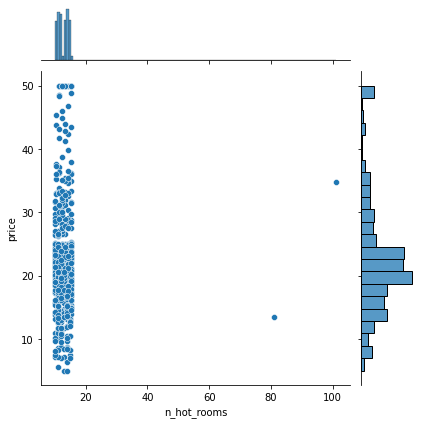

In [14]:
sns.jointplot(x = 'n_hot_rooms', y = 'price', data = df)

<AxesSubplot:xlabel='rainfall'>

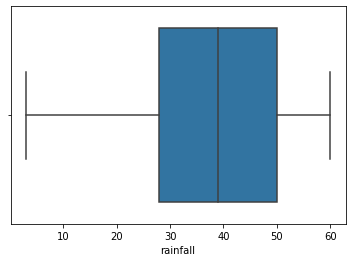

In [15]:
sns.boxplot(x = df['rainfall'])

<function matplotlib.pyplot.show(close=None, block=None)>

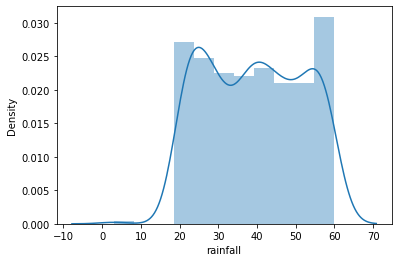

In [16]:
sns.distplot(df['rainfall'])
plt.show

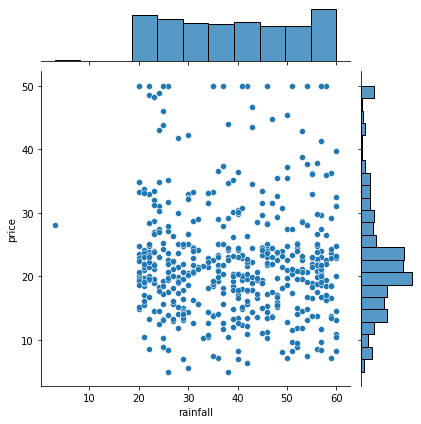

In [17]:
sns.jointplot(x = 'rainfall', y = 'price', data = df)

## Categorical variable visualisation

<AxesSubplot:xlabel='airport', ylabel='count'>

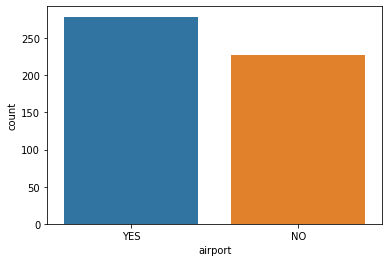

In [18]:
sns.countplot(x = 'airport', data = df)

<AxesSubplot:xlabel='waterbody', ylabel='count'>

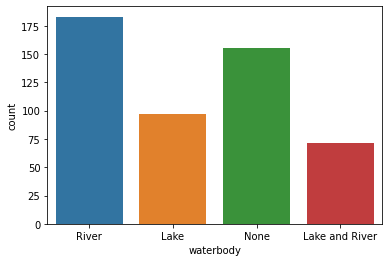

In [19]:
sns.countplot(x = 'waterbody', data = df)

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

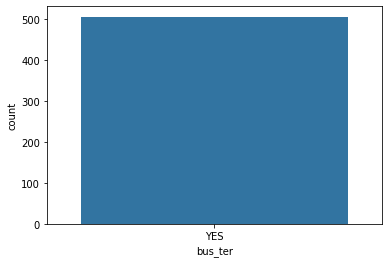

In [20]:
sns.countplot(x = 'bus_ter', data = df)

## Observations

1. Missing values in n_hos_beds
2. Skewness and outliers in crime rate
3. Non-linear relationship between price and crime rate (so outliers of crime rate can be treated by transformation from non    linear to linear)
4. Skewness in age
5. Skewness and outliers in n_hot_rooms
6. Skewness and outliers in rainfall
7. Bus_ter has only 'Yes' values

## Outlier Treatment

In [21]:
np.percentile(df.n_hot_rooms,[99])

array([15.39952])

In [22]:
np.percentile(df.n_hot_rooms,[99])[0]

15.39952

In [23]:
uv = np.percentile(df.n_hot_rooms,[99])[0]

In [24]:
df[(df.n_hot_rooms > uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [25]:
df.n_hot_rooms[(df.n_hot_rooms > 3*uv)] = 3*uv

In [26]:
df[(df.n_hot_rooms > uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344


In [27]:
np.percentile(df.rainfall,[1])

array([20.])

In [28]:
np.percentile(df.rainfall,[1])[0]

20.0

In [29]:
lv = np.percentile(df.rainfall,[1])[0]

In [30]:
df[(df.rainfall < lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [31]:
df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv

In [32]:
df[(df.rainfall < lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,6,YES,0.044019


In [33]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711


## Missing value imputation

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [35]:
df.n_hot_rooms = df.n_hot_rooms.fillna(df.n_hot_rooms.mean())

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

## Variable Transformation

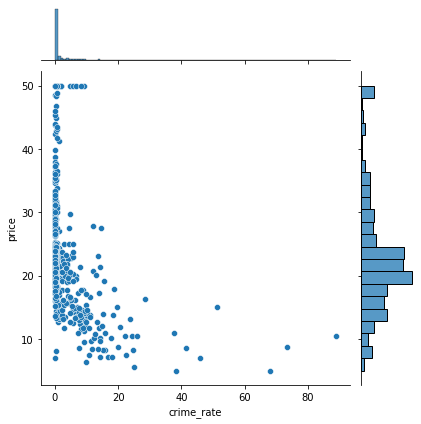

In [37]:
sns.jointplot(x = 'crime_rate', y = 'price', data = df)
plt.show()

In [38]:
df.crime_rate = np.log(1 + df.crime_rate)

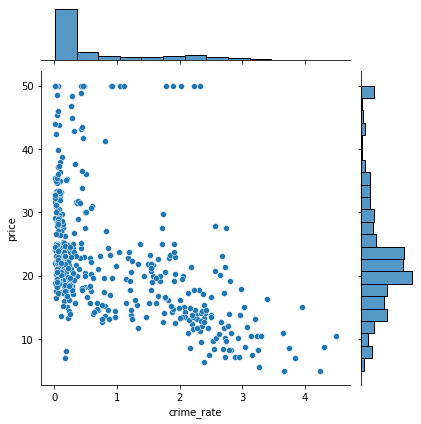

In [39]:
sns.jointplot(x = 'crime_rate', y = 'price', data = df)
plt.show()

In [40]:
df['avg_dist'] = (df.dist1 + df.dist2 + df.dist3 + df.dist4)/4

In [41]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500


In [42]:
del df['dist1']

In [43]:
del df['dist2']

In [44]:
del df['dist3']

In [45]:
del df['dist4']

In [46]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500


In [47]:
del df['bus_ter']    # it does not provide any useful information

## Dummy variable creation

In [48]:
df = pd.get_dummies(df)

In [49]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,1,0,1,0,0,0


In [50]:
del df['airport_NO']    # airport_No and airport_YES both resemble same conclusion and so one of the variable become redundant

In [51]:
del df['waterbody_None']

In [52]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0


## correlation

In [53]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.109646,0.017007,-0.047200,-0.391574,0.249289,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,-0.390052,0.608970,-0.004133,0.056570,0.082151,0.638951,-0.586371,-0.134486,-0.025390,0.009076,-0.060099
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005827,-0.003761,0.055845,0.707635,-0.708022,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049954,0.007238,0.091956,0.915544,-0.769247,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032207,0.014583,-0.064718,-0.282817,0.205241,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021102,0.013918,0.074684,0.673850,-0.747906,0.005101,0.003452,-0.004354,-0.088609
teachers,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008130,-0.037007,-0.045928,-0.187004,0.232452,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066434,0.017036,0.061444,0.552310,-0.496967,-0.095054,0.003197,0.020620,-0.109004
n_hos_beds,0.109646,-0.004133,0.005827,-0.049954,0.032207,-0.021102,-0.008130,-0.066434,1.000000,-0.003141,0.058966,-0.072002,-0.028028,-0.006412,0.042869,0.059560,-0.074934
n_hot_rooms,0.017007,0.056570,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003141,1.000000,0.014869,0.023757,-0.020700,-0.055338,0.037925,0.014755,-0.064096


## Observations

Our dependent variable is price and price is highly correlated with  'poor_prop', 'room_num', 'teachers', 'resid_area', 'crime_rate', 'air_qual'.

# Building the Linear Regression Model

## Simple Linear Regression

In [54]:
y = df['price']     

In [55]:
x = df[['room_num']]          # independent variable is two dimensional array

In [56]:
import statsmodels.api as sm

In [57]:
x_sm = sm.add_constant(x)

In [58]:
lm_0 = sm.OLS(y, x_sm).fit()

In [59]:
lm_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           1.31e-74
Time:                        01:32:12   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## observation
Thus, from the hypothesis testing it is observed that 'price' is strongly dependent on 'room_num'. 

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lm_1 = LinearRegression()       # creating linear regression model

In [62]:
lm_1.fit(x, y)

LinearRegression()

In [63]:
print(lm_1.intercept_, lm_1.coef_)

-34.659243123097184 [9.09966966]


In [64]:
lm_1.predict(x)                 # predicting the value of y depending upon the linear model generated

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

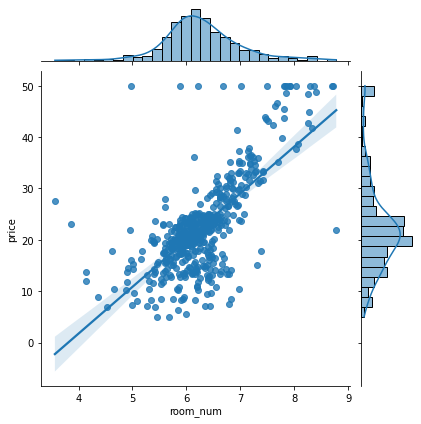

In [65]:
sns.jointplot(x = df['room_num'], y = df['price'], data = df, kind = 'reg')

## Multi-variable Linear Regression Model

In [66]:
x_multi = df[['poor_prop', 'room_num', 'teachers', 'resid_area', 'crime_rate', 'air_qual']]

In [67]:
x_multi.head()

,poor_prop,room_num,teachers,resid_area,crime_rate,air_qual
0,4.98,6.575,24.7,32.31,0.006300,0.538
1,9.14,6.421,22.2,37.07,0.026944,0.469
2,4.03,7.185,22.2,37.07,0.026924,0.469
3,2.94,6.998,21.3,32.18,0.031857,0.458
4,5.33,7.147,21.3,32.18,0.066770,0.458


In [68]:
y_multi = df['price']              # multiple linear regression

In [69]:
y_multi.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [70]:
x_multi_sm = sm.add_constant(x_multi)

In [71]:
lm_multi_0 = sm.OLS(y_multi, x_multi_sm).fit()

In [72]:
lm_multi_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     178.8
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          7.04e-121
Time:                        01:32:13   Log-Likelihood:                -1549.1
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     499   BIC:                             3142.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.6978      4.343     -4.536      0.000     -28.230     -11.165
poor_prop     -0.5580      0.052    -10.709      0.000      -0.660      -0.456
room_num       4.5735      0.433     10.566      0.000       3.723       5.424
teachers       0.9528      0.127      7.474      0.000       0.702       1.203
resid_area     0.0633      0.058      1.090      0.276      -0.051       0.177
crime_rate    -0.0320      0.362     -0.088      0.930      -0.744       0.680
air_qual      -4.6190      3.618     -1.277      0.202     -11.727       2.489
==============================================================================
Omnibus:                      213.353   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1142.495
Skew:                           1.790   Prob(JB):                    8.13e-249
Kurtosis:                       9.432   Cond. No.                         933.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## observations
Thus, from the hypothesis testing it is observed that the 'price' is dependent on 'poor_prop', 'room_num', 'teachers', 'resid_area' but not dependent on 'crime_rate' and 'air_qual'.

In [73]:
x_multi_modified = df[['poor_prop', 'room_num', 'teachers', 'resid_area']]

In [74]:
lm_multi_1 = LinearRegression()

In [75]:
lm_multi_1.fit(x_multi_modified, y_multi)

LinearRegression()

In [76]:
print(lm_multi_1.intercept_, lm_multi_1.coef_)

-18.48813105581792 [-0.58164825  4.496636    0.91812998  0.00817476]


In [77]:
lm_multi_1.predict(x_multi_modified)                 # predicting the value of y depending upon the linear model generated

array([31.12257924, 25.75402748, 32.16167996, 31.08851406, 30.3683735 ,
       27.21408328, 24.39495835, 21.20574385, 12.5028956 , 21.64268792,
       21.3714115 , 23.89288391, 21.93406585, 21.21419682, 20.71190581,
       20.57493755, 22.12841298, 17.67019359, 17.00230177, 18.45936591,
       12.08814007, 18.04636223, 15.99800684, 13.84390162, 16.42532897,
       14.84177613, 16.79285827, 16.40839991, 21.02867701, 22.31052642,
       11.81215477, 18.9870044 ,  9.90563493, 14.23020022, 14.84889141,
       21.95112311, 20.53118112, 22.10720223, 21.83777038, 28.84724172,
       32.13735548, 29.73131997, 26.46464293, 25.70541499, 23.83961487,
       21.71552889, 19.89148491, 18.28399972,  8.46102688, 17.87172497,
       22.09410429, 25.11581894, 29.31032705, 25.17136078, 17.01026594,
       31.85614368, 27.95062868, 32.9808992 , 24.07880797, 21.72585145,
       18.60359952, 18.86501637, 25.55287604, 25.31768099, 28.6782081 ,
       29.2955102 , 23.79392152, 22.89915058, 18.71968118, 22.52

## Train-Test-Split

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_multi_modified, y_multi, test_size = 0.2, random_state = 0)

In [80]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 4) (102, 4) (404,) (102,)


In [81]:
x_train_sm = sm.add_constant(x_train)

In [82]:
lm_multi_00 = sm.OLS(y_train, x_train_sm).fit()

In [83]:
lm_multi_00.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     261.1
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          5.76e-110
Time:                        01:32:14   Log-Likelihood:                -1211.1
No. Observations:                 404   AIC:                             2432.
Df Residuals:                     399   BIC:                             2452.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.7703      4.405     -4.488      0.000     -28.431     -11.110
poor_prop     -0.5622      0.049    -11.485      0.000      -0.658      -0.466
room_num       4.2664      0.455      9.375      0.000       3.372       5.161
teachers       1.1088      0.125      8.873      0.000       0.863       1.355
resid_area    -0.0308      0.045     -0.687      0.492      -0.119       0.057
==============================================================================
Omnibus:                      148.634   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              675.953
Skew:                           1.546   Prob(JB):                    1.65e-147
Kurtosis:                       8.531   Cond. No.                         892.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
lm_multi_01 = LinearRegression()

In [85]:
lm_multi_01.fit(x_train, y_train)

LinearRegression()

In [86]:
print(lm_multi_01.intercept_, lm_multi_01.coef_)

-19.77030910791737 [-0.56215941  4.26642859  1.10884762 -0.0307742 ]


In [87]:
lm_multi_01.predict(x_test)

array([27.71417861, 21.86737557, 26.33509057, 12.41186958, 22.18142194,
       20.25292178, 19.4611702 , 21.34151448, 17.06416322, 21.57274777,
       14.52802266, 17.17722703, 17.75724238,  4.65419224, 38.96508054,
       34.55577873, 21.29808982, 38.43796757, 30.06059551, 22.21555029,
       25.06836502, 25.08157312, 18.44160905, 27.56045283, 22.10154714,
        9.69226332, 17.79864946, 22.23829443, 35.6712962 , 19.99861083,
       16.95676126, 18.38504354, 23.15790963, 24.13488786, 27.42034836,
       17.23270595, 11.19873512, 20.77792704, 17.87143129, 13.44632576,
       26.80751103, 20.33034762, 25.92404463, 13.66097086, 29.01129329,
       25.96190933, 21.28844725, 24.40684125, 11.2104009 , 23.62675066,
       24.56118504, 16.36893774, 23.14397323, 35.54743268, 14.31000276,
       22.85716642, 22.09095322, 20.71977169, 19.58303238, 18.42932643,
       24.04089378, 21.87729747, 32.67661773, 30.01554173, 16.78126825,
       32.10728147, 19.13063053, 22.27454795, 18.81869016, 21.73

In [88]:
y_test_pred = lm_multi_01.predict(x_test)

In [89]:
from sklearn.metrics import r2_score

In [90]:
r2_score(y_test, y_test_pred)

0.4894003509980598

# Conclusion

The Regression model has the accuracy of about 49%